# Hypothyroidism
This project builds off of my previous Fundamentals Capstone project.  In exploring the data there was a particularly interesting aspect that merits further investigation.  

This directory contains the latest version of an archive of thyroid diagnoses
obtained from the Garvan Institute, consisting of 9172 records from 1984 to
early 1987.

When the data was split into groups by gender and displayed as a histogram by age some differences between the two groups begins to appear:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import scipy.stats as stats
%matplotlib inline

In [2]:
ht = pd.read_csv('hypothyroid data.csv', header=None)

In [3]:
#create column names
ht.columns=['hypothyroid','age','sex','on_thyroxine','query_on_thyroxine',
            'on_antithyroid_medication','thyroid_surgery','query_hypothyroid',
            'query_hyperthryoid','pregnant','sick','tumor','lithium','goiter',
            'TSH_measured','TSH','T3_measured','T3','TT4_measured','TT4',
            'T4U_measured','T4U','FTI_measured','FTI','TBG_measured','TBG']

In [4]:
#Replace '?' values with 0
ht = ht.replace(['?'], 0)

In [5]:
#convert numbers to ints and floats for accurate scatter and bar plots.
for index, age in enumerate(ht['age']):
    if age != 'NaN':
        ht['age'][index] = int(age)
for index, T3 in enumerate(ht['T3']):
    if T3 != 'NaN':
        ht['T3'][index] = float(T3)
for index, TSH in enumerate(ht['TSH']):
    if TSH != 'NaN':
        ht['TSH'][index] = float(TSH)
for index, TT4 in enumerate(ht['TT4']):
    if TT4 != 'NaN':
        ht['TT4'][index] = float(TT4)
for index, T4U in enumerate(ht['T4U']):
    if T4U != 'NaN':
        ht['T4U'][index] = float(T4U)
for index, FTI in enumerate(ht['FTI']):
    if FTI != 'NaN':
        ht['FTI'][index] = float(FTI)
for index, TBG in enumerate(ht['TBG']):
    if TBG != 'NaN':
        ht['TBG'][index] = float(TBG)

In [6]:
#Change figure size
plt.rcParams["figure.figsize"] = [12,4]

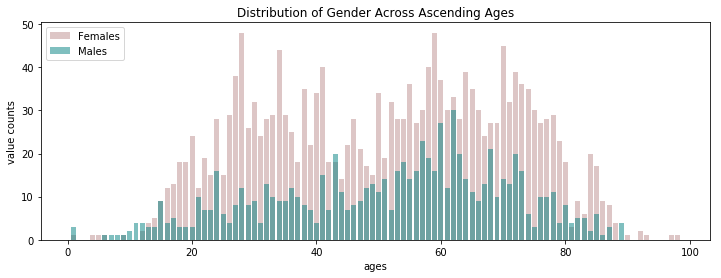

In [7]:
plt.bar(x=np.unique(ht['age'].loc[(ht['age']!=0)
                                 &(ht['sex'].isin(['F']))]),
        height=ht['age'].loc[(ht['age']!=0)
                            &(ht['sex'].isin(['F']))].value_counts(sort=False),
        color='rosybrown', alpha=.5, label='Females')
plt.bar(x=np.unique(ht['age'].loc[(ht['age']!=0)
                    &ht['sex'].isin(['M'])]),
        height=ht['age'].loc[(ht['age']!=0)
                    &ht['sex'].isin(['M'])].value_counts(sort=False), 
        color='teal',alpha=.5, label='Males')

plt.legend(loc='upper left')
plt.xlabel('ages')
plt.ylabel('value counts')
plt.title('Distribution of Gender Across Ascending Ages')

plt.show()

Two things stand out: 1. There are nearly twice as many women than men seeking clinical care for thyroid related issues at any age group and 2. Men tend to seek out care more as they get older and less so in their earlier years.

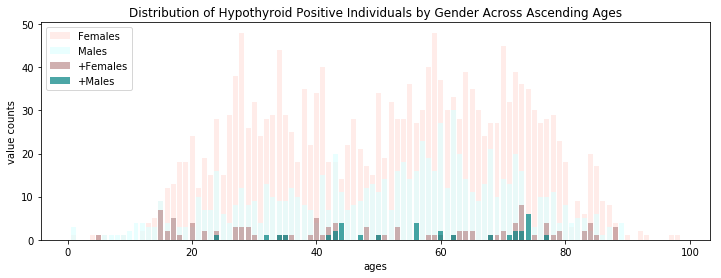

In [8]:
#Change figure size
plt.rcParams["figure.figsize"] = [12, 4]

plt.bar(x=np.unique(ht['age'].loc[(ht['age']!=0)
                                 &(ht['sex'].isin(['F']))]),
        height=ht['age'].loc[(ht['age']!=0)
                            &(ht['sex'].isin(['F']))].value_counts(sort=False),
        color='mistyrose', alpha=.7, label='Females')
plt.bar(x=np.unique(ht['age'].loc[(ht['age']!=0)
                    &ht['sex'].isin(['M'])]),
        height=ht['age'].loc[(ht['age']!=0)
                    &ht['sex'].isin(['M'])].value_counts(sort=False), 
        color='lightcyan',alpha=.7, label='Males')

plt.bar(x=np.unique(ht['age'].loc[(ht['age']!=0)
                                 &(ht['sex'].isin(['F']))
                                 &(ht['hypothyroid'].isin(['hypothyroid']))]),
        height=ht['age'].loc[(ht['age']!=0)
                             &(ht['sex'].isin(['F']))
                             &(ht['hypothyroid'].isin(['hypothyroid']))
                            ].value_counts(sort=False),
        color='rosybrown', alpha=.7, label='+Females')
plt.bar(x=np.unique(ht['age'].loc[(ht['age']!=0)
                                  &(ht['sex'].isin(['M']))
                                  &(ht['hypothyroid'].isin(['hypothyroid']))]),
        height=ht['age'].loc[(ht['age']!=0)
                             &(ht['sex'].isin(['M']))
                             &(ht['hypothyroid'].isin(['hypothyroid']))
                            ].value_counts(sort=False), 
        color='teal',alpha=.7, label='+Males')

plt.legend(loc='upper left')
plt.xlabel('ages')
plt.ylabel('value counts')
plt.title('Distribution of Hypothyroid Positive Individuals by Gender Across Ascending Ages')

plt.show()

Looking at the number of cases of diagnosed hypothyroidism it seems there are a lot less men being diagnosed than women.
Indeed - this variance in expression is reported quite frequently in literature and is explained as a byproduct of the higher occurance of automimmune disease in women.  As modern medicine has cured most other causes of hypothyroidism the pattern of expression begins to resemble its parent condition of autoimmunity.

web sites explaining hypothyroidism in men:
https://www.everydayhealth.com/thyroid-conditions/hypothyroidism-symptoms-in-men.aspx
https://www.bodylogicmd.com/for-men/thyroid-health

This might be true, but it might also be true that less men get diagnosed because less men seek help.
Using the data in this data set, a quick look shows the precentage of men actually diagnosed is not much different from the percentage of women diagnosed.
Let's look at the data we have on hand and see if we can get some preliminary suggestions from it:

In [9]:
#to calculate percent M vs F - convert hypothyroid column into 1 = hypothyroid positive 0 = negative.
#Replace '?' values with 0
ht['HT_percent'] = ht['hypothyroid'].replace(['hypothyroid', 'negative'], [1, 0])

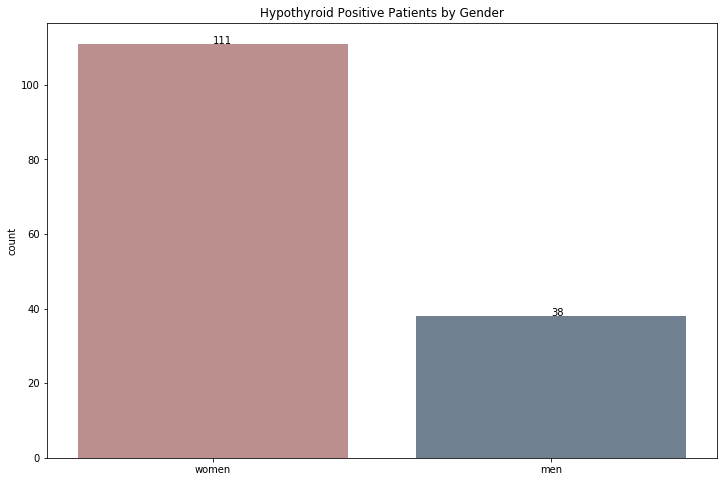

In [10]:
#Look at the difference between diagnosed men and women only
#Change figure size
plt.rcParams["figure.figsize"] = [12, 8]

ind = np.arange(2)

fColor = 'rosybrown'
mColor = 'slategrey'

plt.bar(ind, np.array([
    ht[ht.HT_percent==1].sex[ht.sex=='F'].count()
    , ht[ht.HT_percent==1].sex[ht.sex=='M'].count()
])
    , color=[fColor,mColor])

plt.ylabel('count')
plt.xticks(ind, ['women','men'])
plt.title('Hypothyroid Positive Patients by Gender')
plt.text(s=ht[ht.HT_percent==1].sex[ht.sex=='F'].count(), x=0, y=ht[ht.HT_percent==1].sex[ht.sex=='F'].count())
plt.text(s=ht[ht.HT_percent==1].sex[ht.sex=='M'].count(), x=1, y=ht[ht.HT_percent==1].sex[ht.sex=='M'].count())

plt.show()

There are almost 3 times as many women diagnosed as men.

Now lets look at those same numbers expressed as a ratio of hypothyroid diagnosis vs total sample.  In other words, the relative proportion based on patients treated.

In [11]:
#method for calculating errors for bar graph
def ht_error_calc_MF(sex):
    
    try:
        return (ht['HT_percent'].loc[(ht['sex'].isin([sex]))
                ].std())/((ht['HT_percent'].loc[(ht['sex'].isin([sex]))
                ].count())**.5)
    except ValueError:
        print('input error')

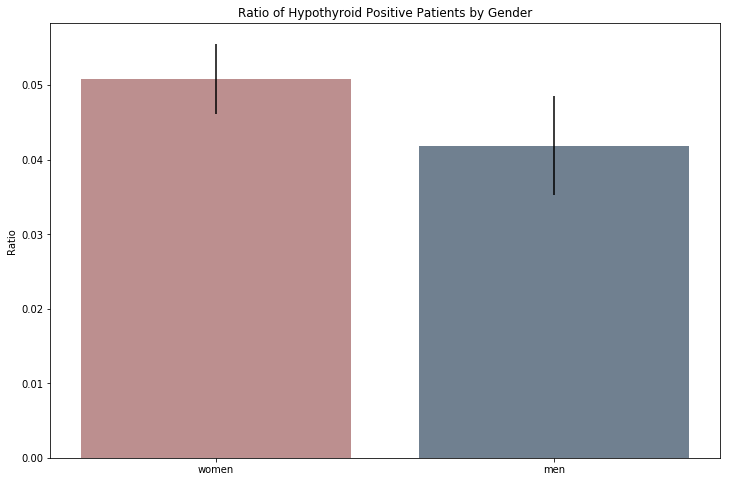

In [14]:
#Change figure size
plt.rcParams["figure.figsize"] = [12, 8]

ind = np.arange(2)

fColor = 'rosybrown'
mColor = 'slategrey'

plt.bar(ind, np.array([
    ht['HT_percent'].loc[ht['sex'].isin(['F'])].mean()
    , ht['HT_percent'].loc[ht['sex'].isin(['M'])].mean()
])
    , color=[fColor,mColor], yerr=[ht_error_calc_MF('F'), ht_error_calc_MF('M')])

plt.ylabel('Ratio')
plt.xticks(ind, ['women','men'])
plt.title('Ratio of Hypothyroid Positive Patients by Gender')

plt.show()

In [13]:
tval,pval=stats.ttest_ind(ht['HT_percent'].loc[ht['sex'].isin(['F'])]
                          , ht['HT_percent'].loc[ht['sex'].isin(['M'])]
                          ,equal_var=True)
print('t-value is: ', tval, '\np-value is: ', pval)

t-value is:  1.0660578192374937 
p-value is:  0.28648084740348156


A preliminary look using the current data set shows that there is potentially no difference between the two groups.  A p-value of 0.286 is not significant enough to confidently state that the groups are different.

So looking at diagnosis relative to the number of patients seeking treatment levels things out a bit. Based on this information we could build a bigger study to properly test this hypothesis:

Experiment plan to test the hypothesis that diagnosis of male patients is a factor of treatment seeking behavior.  In other words, there is no difference in the ratio of men diagnosed and women diagnosed among patients seeking treatment:

Analysis:
Compare diagnosis of men vs women relative to the number of patients enrolling in clinics for treatment.  There are two ways to gather data - historical records of select clinics, which can be split into time periods to see if diagnosis patterns have historically remained consistent, and/or monitoring newly enrolled patients over a period of time for current diagnosis patterns.

Group A = women enrolling to clinics for treatment
Group B = Men enrolling to clinics for treatment

Primary Outcomes:Ratio of diagnosed with hypothyroidism to total sample size.

Secondary Outcomes: Symptoms reported, Age groups, typr of hypothyroidism.

Rollout for historical records would consist of splitting the groups into relevant time periods - perhaps coinciding with shifts in diagnostic criteria.
Rollout for current evaluation - monitor selected clinics over a period of time deemed sufficient based on number of patients typically enrolled in a week, month, or year.  Evaluate the data at the end of this period and either draw a conclusion or extend the study for a lonfer perios of time to collect more patients.

Success will be determined when a sufficient number of patients in each group have been collected (as predetermined by a power calculation to find an appropriate number of patients to generate a sufficient p-value).